3/3 [==============================] - 1s 151ms/step - loss: 2.1868


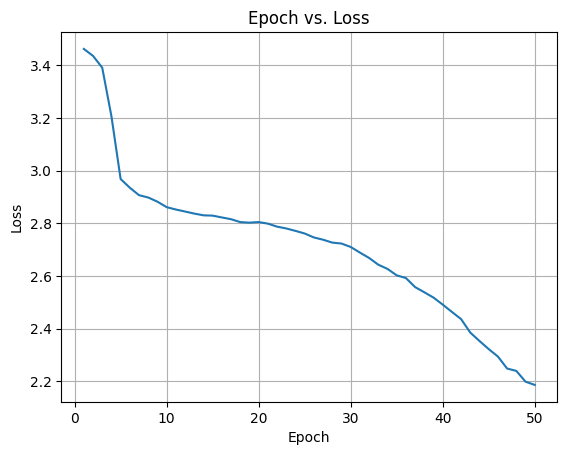

1/1 [==============================] - 0s 40ms/step
character-level language modeling is s s s s a s car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car car


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Sample text data
text = """
Character-level language modeling is a text generation task where the model predicts the next character in a sequence of characters.
Recurrent Neural Networks (RNNs) are suitable for this task, as they can capture sequential dependencies.
"""

# Preprocess the text
text = text.lower()  # Convert text to lowercase
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(text)
total_chars = len(tokenizer.word_index) + 1  # Total number of unique characters

# Generate input sequences and target characters
input_sequences = []
target_chars = []
seq_length = 100  # Adjust this sequence length as needed

for i in range(0, len(text) - seq_length, 1):
    input_seq = text[i:i + seq_length]
    target_seq = text[i + seq_length]
    input_sequences.append(input_seq)
    target_chars.append(target_seq)

# Encode input sequences and target characters
X = np.array([[tokenizer.word_index[char] for char in seq] for seq in input_sequences])

# Encode target characters as one-hot vectors
y = to_categorical([tokenizer.word_index[char] for char in target_chars], num_classes=total_chars)

# Define the RNN model
model = Sequential()
model.add(Embedding(total_chars, 128, input_length=seq_length))
model.add(LSTM(128))
model.add(Dense(total_chars, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Lists to store loss values during training
loss_history = []

# Train the model (you may need to adjust batch size and epochs)
epochs = 50
for epoch in range(epochs):
    history = model.fit(X, y, epochs=1, batch_size=64, verbose=1)
    loss_history.append(history.history['loss'][0])

# Plot the loss curve
plt.plot(range(1, epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.grid(True)
plt.show()

# Text generation
seed_text = "character-level language modeling is"
generated_text = seed_text

for _ in range(200):
    x = np.array([[tokenizer.word_index[char] for char in seed_text]])
    # Pad the input sequence to match the expected input length
    x = pad_sequences(x, maxlen=seq_length, truncating='pre', value=tokenizer.word_index[' '])
    predicted_char_index = np.argmax(model.predict(x))
    predicted_char = tokenizer.index_word[predicted_char_index]
    generated_text += predicted_char
    seed_text = seed_text[1:] + predicted_char

print(generated_text)
